In [134]:
import os 
os.chdir('C:/Users/BIOJEAN/Desktop/이용준/건강검진/파일')

import pandas as pd
import numpy as np
import pandas_profiling 
import missingno as msno
from datetime import datetime 
from scipy import stats
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 적용
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

In [227]:
data = pd.read_csv('국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949')

In [ ]:
pd.set_option('display.max_rows',30)
pd.set_option('display.max_columns',len(data))

## 데이터 상세
- 성별코드 
    - 남자 1, - 여자 2 
    <br>
- 연령대 
  * 수진자 나이 5세 단위로 범주화해 구분한 코드 (단위:세)
  * 02-13, 14년 이후 연령별 그룹 변경.
    - 5 : 20-24
    - 6 : 25-29
    - 7 : 30-34
    - 8 : 35-39
    - 9 : 40-44
    - 10: 45-49
    - 11: 50-54
    - 12: 55-59
    - 13: 60-64
    - 14: 65-69
    - 15: 70-74
    - 16: 75-79
    - 17: 80-84
    - 18: 85 이상
<br>
- 시도코드
    - 11 : 서울시특별시
    - 26 : 부산광역시
    - 27 : 대구광역시
    - 28 : 인천광역시
    - 29 : 광주광역시
    - 30 : 대전광역시
    - 31 : 울산광역시
    - 36 : 세종특별자치시
    - 41 : 경기도
    - 42 : 강원도
    - 43 : 충청북도
    - 44 : 충청남도
    - 45 : 전라북도
    - 46 : 전라남도
    - 47 : 경상북도
    - 48 : 경상남도
    - 49 : 제주특별자치도
<br>    
- 허리둘레
  * 해당 항목은 08년 부터 추가된 문진항목
<br>
- 시력 
  * 0.1 ~ 2.5 사이의 값으로 표기하며
  * 0.1 이하는 0.1로 표기(실명은 9.9)
<br>
- 청력 
  - 1 - 정상
  - 2 - 비정상
<br>
- 총 콜레스테롤 
  - 정상치 : 150~250 mg/dL
<br>
- 트리클리세라이드
  - 정상치 : 30~135 mg/dL
  - 08년 이후 문진항목
<br>
- HDL 콜레스테롤
  - 정상치 : 30~65
  - 08년 이후 문진항목
<br>
- LDL 콜레스테롤
  - 170mg/dL 이상일 경우 고LDL혈증으로 간주
  - 08년 이후 문진항목
<br>
- 요단백
  - 소변에 단백질이 섞여 나오는 것.
  - 성인의 경우 하루 500 mg이상 배출될 경우 단백뇨
  - 하루 30 - 300mg의 단백 배설시 미세단백뇨
    * 1(-), 음성
    * 2(+-), 약양성
    * 3(+1), 30mg/dL
    * 4(+2), 100mg/dL
    * 5(+3), 300mg/dL
    * 6(+4), 1,000mg/dL
<br> 
- 혈청크레아티닌
  - 정상치 0.8~1.7mg/dL
  - 08년 이후 문진항목
<br>  
- (혈청지오티) AST
  - 간기능 나타내는 혈액검사상의 수치(손상받을 경우 농도 증가, 간세포 외 심장, 신장, 뇌, 근육 등에 존재)
  - 정상치 0~40IU/L
<br>  
- (혈청지오티) ALT
  - 간기능 나타내는 혈액검사상의 수치(손상받을 경우 농도 증가, 주로 간세포에 존재)
  - 정상치 0~40IU/L
<br>
- 감마지티피
  - 간기능 나타내는 혈액검사상의 수치(손상받을 경우 농도 증가, 주로 담관에 존재)
  - (정상치) 남성 : 11-63IU/L, 여성 : 3-35IU/L
 <br>
- 흡연상태
  - 1 : 피우지 않는다.
  - 2 : 이전에 피웠으나 끊었다.
  - 3 : 현재도 흡연
<br>  
- 음주여부
  - 0,N - 마시지 않는다.
  - 1,Y - 마신다.
<br>
- 구강검진수검여부
  - 0,N - 미수검
  - 1,Y - 수검
<br>
- 치아우식증 유무
  - 0-없음 
  - 1-있음
 <br>
- 결손치 유무
  - 0-없음
  - 1-있음
<br>
- 치아마모증 유무
  - 0-없음
  - 1-있음
<br>  
- 제 3대구치(사랑니) 이상
  - 0-없음
  - 1-있음
<br>  
- 치석
  - 0,N - 없음
  - 1,Y - 있음
<br>      

### 범주형 자료
 - 연령대 코드
 - 시도코드
 - 신장
 - 체중
 - 청력(좌/우)
 - HDL 콜레스테롤(도수)
 - LDL 콜레스테롤(도수)
 - 요단백
 - 혈청크레아틴
 - AST
 - ALT
 - 감마지티피
 - 흡연상태
 - 음주상태
 - 구강검진 수검여부
 - 치아우식증 유무
 - 치아마모증 유무
 - 제3 대구치 이상유무
 - 치석


## Data report

In [ ]:
pp = data.profile_report()
pp.to_file('./report.html')

## 데이터 확인

In [141]:
data.shape

(1000000, 34)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [560]:
# 컬럼별 결측치 비율
(data.isnull().sum()/len(data)*100).apply(lambda x : '%.2f'%x+'%')

기준년도               0.00%
가입자 일련번호           0.00%
시도코드               0.00%
성별코드               0.00%
연령대 코드(5세단위)       0.00%
신장(5Cm단위)          0.00%
체중(5Kg 단위)         0.00%
허리둘레               0.04%
시력(좌)              0.02%
시력(우)              0.02%
청력(좌)              0.02%
청력(우)              0.02%
수축기 혈압             0.54%
이완기 혈압             0.54%
식전혈당(공복혈당)         0.55%
총 콜레스테롤           66.65%
트리글리세라이드          66.65%
HDL 콜레스테롤         66.65%
LDL 콜레스테롤         67.29%
혈색소                0.55%
요단백                1.03%
혈청크레아티닌            0.55%
(혈청지오티)AST         0.55%
(혈청지오티)ALT         0.55%
감마 지티피             0.55%
흡연상태               0.02%
음주여부              35.51%
구강검진 수검여부          0.00%
치아우식증유무           60.23%
결손치 유무             0.00%
치아마모증유무            0.00%
제3대구치(사랑니) 이상      0.00%
치석                60.23%
데이터 공개일자           0.00%
BMI                0.00%
BMI_CATE           0.00%
총 콜레스테롤_cate      66.65%
트리글리세라이드_cate     66.65%
HDL 콜레스테롤_cate    66.65%
LDL 콜레스테롤_cate    67.29%


In [ ]:
sns.pairplot(data[:5])
plt.show()

In [ ]:
data.corr()

In [28]:
data.head(10)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
5,2019,6,11,1,8,170,110,107.8,1.2,1.5,1.0,1.0,139.0,87.0,108.0,215.0,142.0,37.0,150.0,14.8,1.0,0.9,42.0,44.0,129.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
6,2019,7,41,1,6,175,70,81.3,0.9,1.0,1.0,1.0,120.0,72.0,90.0,148.0,51.0,45.0,93.0,13.1,1.0,0.9,14.0,11.0,30.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
7,2019,8,11,1,12,165,65,85.0,0.7,0.8,1.0,1.0,140.0,90.0,130.0,NaN,NaN,NaN,NaN,16.2,1.0,1.1,29.0,30.0,68.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
8,2019,9,31,1,14,165,75,88.9,0.6,0.7,1.0,1.0,132.0,74.0,99.0,NaN,NaN,NaN,NaN,14.4,1.0,0.6,27.0,22.0,26.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
9,2019,10,11,2,13,145,50,78.0,0.2,0.1,1.0,1.0,104.0,60.0,98.0,NaN,NaN,NaN,NaN,13.7,1.0,1.0,33.0,23.0,23.0,1.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231


In [ ]:
# print((data.isnull().sum()/len(data)*100).astype(float,'%.2f'))
print(msno.matrix(data))
# ## 결측치 60% 이상인 열 제거 필요

In [142]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [151]:
category = ['시도코드','성별코드','연령대 코드(5세단위)','청력(좌)','청력(우)','흡연상태','음주여부','구강검진 수검여부',
            '치아우식증유무','결손치 유무','치아마모증유무','제3대구치(사랑니) 이상','치석']

for var in category : 
    data[var] = (data[var].astype('category'))

### BMI 지수 
 - 체중 / (신장/100)**2
   - bmi < 18.5 : 저체중
   - 18.5 <= bmi  <= 22.9 : 정상
   - 23.0 <= bmi <=24.9 : 과체중
   - bmi >= 25 : 비만

In [228]:
# BMI 지수 계산
data['BMI'] = data['체중(5Kg 단위)'] / pow((data['신장(5Cm단위)']/100),2)

In [290]:
bins = [1, 18.5, 22.9, 24.9,100]
cuts = pd.Series(pd.cut(data['BMI'], bins = bins, labels=['저체중','정상','과체중','비만']))
data['BMI_CATE'] = cuts.astype('category')

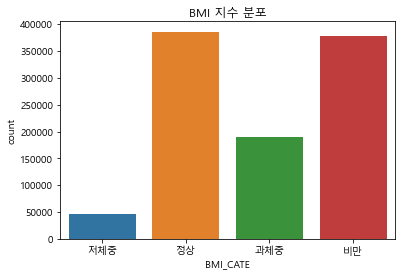

In [291]:
sns.countplot(x='BMI_CATE', data= data)
plt.title('BMI 지수 분포')
plt.show()

672852

In [329]:
data[(data['총 콜레스테롤'].isnull()) & data['LDL 콜레스테롤'].notnull()]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자,BMI,BMI_CATE
225277,2019,225278,42,1,9,170,70,80.0,0.8,0.7,1.0,1.0,116.0,78.0,85.0,NaN,NaN,NaN,107.0,15.4,2.0,0.7,33.0,47.0,21.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231,24.221453,과체중
673104,2019,673105,11,2,10,145,60,84.0,0.7,0.6,1.0,1.0,115.0,66.0,96.0,NaN,NaN,NaN,1.0,13.6,3.0,0.9,29.0,34.0,45.0,1.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231,28.537455,비만
724178,2019,724179,11,2,13,155,85,104.0,1.2,0.8,1.0,1.0,161.0,79.0,100.0,NaN,NaN,NaN,1.0,13.3,1.0,1.0,24.0,17.0,15.0,1.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231,35.379813,비만
759129,2019,759130,48,2,17,140,40,80.0,0.4,0.4,1.0,1.0,104.0,69.0,112.0,NaN,88.0,39.0,36.0,15.2,1.0,0.8,21.0,21.0,22.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231,20.408163,정상


혈액검사
1. 총 콜레스테롤 결측치 대체(단위:mg/dL)

- 총 콜레스테롤 
    - (HDL + LDL + 트리글리세라이드/5)
    - 정상 : 200이하
    - 경계 : 200 ~ 239
    - 높음 : 240이상
    
- 트리글리세라이드
     - 정상 : 150이하
     - 경계 : 150 ~ 199
     - 높음 : 200 ~ 399
     - 매우 높음 : 400이상

- HDL 콜레스테롤
    - 낮음 : 40이하
    - 정상 : 41 ~ 59
    - 높음 : 50 이상

- LDL 콜레스테롤
    - 양호 : 100 이하
    - 높은 정상 : 100 ~ 129
    - 경계 : 130 ~ 159
    - 높음 : 160 ~ 189
    - 매우 높음 : 190 이상
    
>(출처)삼성서울병원 가정의학과
http://www.samsunghospital.com/dept/medical/healthSub02View.do?content_id=418&DP_CODE=FM&MENU_ID=003014&ds_code=D0000244&main_content_id=763]

In [446]:
data[(data['총 콜레스테롤'].notnull()) & data['HDL 콜레스테롤'].isnull()]
test= round(data['HDL 콜레스테롤'] + data['LDL 콜레스테롤'] + (data['트리글리세라이드']/5))

In [358]:
print(f"총콜레스테롤 Null값 : {len(data[data['총 콜레스테롤'].isnull()])} \n트리글리세라이드 값 : {len(data[data['트리글리세라이드'].isnull()])} \nHDL 콜레스테롤 Null 값 : {len(data[data['HDL 콜레스테롤'].isnull()])}\nLDL 콜레스테롤 Null 값 : {len(data[data['LDL 콜레스테롤'].isnull()])}")

총콜레스테롤 Null값 : 666451 
트리글리세라이드 값 : 666456 
HDL 콜레스테롤 Null 값 : 666459
LDL 콜레스테롤 Null 값 : 672852


In [435]:
# 총 콜레스테롤
bins = [0,200,239,2400]
data['총 콜레스테롤_cate'] = pd.cut(data['총 콜레스테롤'], bins = bins, labels = ['이상적','약간 높음','높음'])

# 트리글리세라이드
bins = [0,150,199,399,5000]
data['트리글리세라이드_cate']=pd.cut(data['트리글리세라이드'], bins=bins, labels=['이상적','약간높음','높음','매우높음'])

# HDL 콜레스테롤
bins = [0,40,59,600]
data['HDL 콜레스테롤_cate'] = pd.cut(data['HDL 콜레스테롤'], bins = bins, labels=['낮음','정상','높음'])

# LDL 콜레스테롤
bins = [0,100,129,159,189,2300]
data['LDL 콜레스테롤_cate'] = pd.cut(data['LDL 콜레스테롤'], bins = bins, labels=['양호','높은 정상','경계','높음','매우높음'])

2389.0

C:\Users\BIOJEAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BIOJEAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BIOJEAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BIOJEAN\anaconda

<AxesSubplot:xlabel='LDL 콜레스테롤_cate', ylabel='count'>

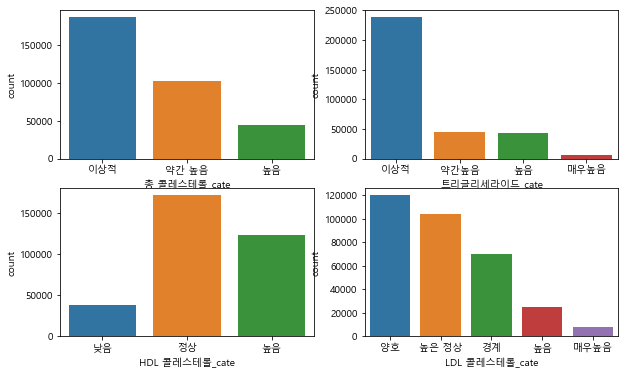

In [497]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot('총 콜레스테롤_cate', data=data)

plt.subplot(2,2,2)
sns.countplot('트리글리세라이드_cate', data=data)
plt.subplot(2,2,3)
sns.countplot('HDL 콜레스테롤_cate', data=data)
plt.subplot(2,2,4)
sns.countplot('LDL 콜레스테롤_cate', data=data)

In [519]:
# 총 콜레스테롤 있으나 그 외 콜레스테롤 미표기 행.
data[(data['총 콜레스테롤'].notnull()) & (data['트리글리세라이드'].isnull())]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자,BMI,BMI_CATE,총 콜레스테롤_cate,트리글리세라이드_cate,HDL 콜레스테롤_cate,LDL 콜레스테롤_cate
55675,2019,55676,43,1,14,165,70,84.0,0.7,0.5,1.0,1.0,149.0,106.0,129.0,168.0,NaN,NaN,NaN,14.7,5.0,1.4,17.0,15.0,32.0,1.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231,25.711662,비만,이상적,NaN,NaN,NaN
251931,2019,251932,26,2,18,140,35,73.0,0.1,0.1,1.0,1.0,102.0,85.0,119.0,222.0,NaN,NaN,NaN,11.0,1.0,1.1,22.0,8.0,5.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231,17.857143,저체중,약간 높음,NaN,NaN,NaN
310296,2019,310297,47,2,11,150,60,77.0,1.0,1.0,1.0,1.0,111.0,70.0,97.0,143.0,NaN,NaN,NaN,15.1,1.0,0.7,37.0,30.0,8.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231,26.666667,비만,이상적,NaN,NaN,NaN
405238,2019,405239,28,2,13,160,75,88.0,0.9,0.8,1.0,1.0,140.0,80.0,108.0,178.0,NaN,NaN,NaN,14.3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231,29.296875,비만,이상적,NaN,NaN,NaN
687524,2019,687525,45,1,6,185,90,85.0,1.5,1.5,1.0,1.0,129.0,74.0,93.0,142.0,NaN,NaN,NaN,15.4,1.0,0.9,29.0,30.0,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231,26.296567,비만,이상적,NaN,NaN,NaN
803967,2019,803968,11,1,13,160,65,89.0,0.5,0.5,1.0,1.0,134.0,74.0,110.0,165.0,NaN,NaN,NaN,14.5,1.0,0.7,23.0,28.0,107.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231,25.390625,비만,이상적,NaN,NaN,NaN


## 트리글리세라이드, HDL, LDL 결측값 대체
[목적]
1. 총 콜레스테롤을 포함해 각각 변수들은 결측치가 60% 이상임을 확인할 수 있다.
2. 위 변수들을 도출해 총 콜레스테롤을 구할 수 있다.(새로운 콜레스테롤 값 이하 새로운 값)
3. 새로운 값과 기존 값을 비교 및 대치

[사용 알고리즘]
1. KNN
  - 데이터를 비슷한 집단으로 묶어 비교하기 위해
 2. 

In [528]:
C = data.iloc[:,16:19].copy()
train = data.iloc[:,:15]

In [552]:
print('%.2f'%(data['성별코드'].value_counts()/len(data) * 100))

TypeError: cannot convert the series to <class 'float'>

In [557]:
(data['성별코드'].value_counts()/len(data) * 100).apply(lambda x : '%.2f'%x)

1    51.96
2    48.04
Name: 성별코드, dtype: object